In [1]:
import pybamm;import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp,sqrt;
import matplotlib as mpl; 
fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

In [2]:
import sys  
str_path_0 = os.path.abspath(os.path.join(pybamm.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip\Rio_Code\Fun_P3"))
sys.path.append(str_path_1) 
from Fun_P3 import *
BasicPath = 'D:/OneDrive - Imperial College London/SimDataSave/P3R11/'; 
Target  = 'onecycle_highcLi/' 
if not os.path.exists(BasicPath + Target):
   os.mkdir(BasicPath + Target)

In [3]:
# Define 3 models: normal DFN, single transport by high Dec, double transport
Model_DFN  = pybamm.lithium_ion.DFN(options={
    "solvent diffusion": "single no consume wo refill",
    "electrolyte conductivity": "full"  ,}) 
Model_SD  = pybamm.lithium_ion.DFN(options={
    "solvent diffusion": "double spatial consume w refill",
    "electrolyte conductivity": "full"  ,}) 
Model_DD  = pybamm.lithium_ion.DFN(options={
    "solvent diffusion": "double spatial consume w refill",
    "electrolyte conductivity": "sol full"  ,}) 
Model_All =[ Model_DFN,  Model_SD, Model_DD ]
Str_model =[ 'Model_DFN',  'Model_SD', 'Model_DD' ]
# 3 parameter set: Andrew, constant. Valoen
Para_All = []
for i in range(1,4):
    para=pybamm.ParameterValues("Li2023_ECdrag")
    para.update({"EC Lithium ion cross diffusivity [m2.s-1]":1.5e-12})
    para.update({"EC initial concentration in electrolyte [mol.m-3]":6250})
    para.update({"Initial concentration in electrolyte [mol.m-3]":3000})
    para.update({"Cation transference number":t_0plus_constant})
    Para_All.append(para)
Para_All[0].update({"Electrolyte conductivity [S.m-1]":electrolyte_conductivity_Andrew2022})
Para_All[0].update({"Electrolyte diffusivity [m2.s-1]":electrolyte_diffusivity_Valoen2005Constant})
Para_All[1].update({"Electrolyte conductivity [S.m-1]":cond_constant})
Para_All[1].update({"Electrolyte diffusivity [m2.s-1]":diff_constant})
Para_All[2].update({"Electrolyte conductivity [S.m-1]":electrolyte_conductivity_Valoen2005Constant})
Para_All[2].update({"Electrolyte diffusivity [m2.s-1]":electrolyte_diffusivity_Valoen2005Constant})
Str_para = ['Andrew', 'Constant', 'Valoen']

In [4]:
Rate_Dis_All = [0.5,1,2,3,4,5,6,7,8,9,10];  Rate_Cha_All = [1,]
# Str_para = ['Andrew', 'Constant', 'Valoen']
Andrew_All = []; para = Para_All[0]; str_para = Str_para[0];
for model,str_model in zip(Model_All,Str_model):
    Andrew_All.append(
        Scan_Crate(Rate_Dis_All,Rate_Cha_All,model,para,str_model,str_para)
        )

2022-12-23 00:15:18.936 - [ERROR] callbacks.on_experiment_error(226): Simulation error: Could not find consistent states: Could not find acceptable solution: .../casadi/core/linsol.cpp:173: Assertion "m->is_nfact" failed:
Linear system has not been factorized


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "d:\gitpybamm\lrh_409\lrh_409\envsolcon\pybamm-gem\pybamm\solvers\base_solver.py", line 641, in calculate_consistent_state
    root_sol = self.root_method._integrate(model, np.array([time]), inputs)
  File "d:\gitpybamm\lrh_409\lrh_409\envsolcon\pybamm-gem\pybamm\solvers\casadi_algebraic_solver.py", line 172, in _integrate
    raise pybamm.SolverError(
pybamm.expression_tree.exceptions.SolverError: Could not find acceptable solution: .../casadi/core/linsol.cpp:173: Assertion "m->is_nfact" failed:
Linear system has not been factorized

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "d:\GitPyBaMM\LRH_409\LRH_409\envSolCon\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\rl1120\AppData\Local\Temp\ipykernel_6824\915933790.py", line 6, in <cell line: 4>
    Scan_Crate(Rate_Dis_All,Rate_Cha_

In [5]:
Constant_All = []; para = Para_All[1]; str_para = Str_para[1];
for model,str_model in zip(Model_All,Str_model):
    Constant_All.append(
        Scan_Crate(Rate_Dis_All,Rate_Cha_All,model,para,str_model,str_para)
        )

At t = 0.00842566, , mxstep steps taken before reaching tout.
At t = 0.0013751, , mxstep steps taken before reaching tout.
At t = 0.0013751, , mxstep steps taken before reaching tout.
At t = 0.000125102 and h = 4.59306e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000125101, , mxstep steps taken before reaching tout.
At t = 0.000125102, , mxstep steps taken before reaching tout.
At t = 0.000125102 and h = 1.00146e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 4.69765e-005, , mxstep steps taken before reaching tout.
At t = 0.00251255, , mxstep steps taken before reaching tout.
At t = 0.00251255, , mxstep steps taken before reaching tout.
At t = 0.000749914 and h = 1.89502e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000749914, , mxstep steps taken before reaching tout.
At t = 0.000124914 and h = 1.01163e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000124914,

Using EC_diffusivity_5E_5
Using EC_diffusivity_5E_5
Using EC_diffusivity_5E_5
Using EC_diffusivity_5E_5


At t = 0.00842567 and h = 1.88574e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00137511, , mxstep steps taken before reaching tout.
At t = 0.00137511, , mxstep steps taken before reaching tout.
At t = 0.000125106 and h = 5.30599e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000125106, , mxstep steps taken before reaching tout.
At t = 0.000125106 and h = 6.17438e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000125106 and h = 2.56081e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 4.69812e-005, , mxstep steps taken before reaching tout.
The linesearch algorithm failed with too small a step.


Using EC_diffusivity_5E_5


At t = 0.00251255, , mxstep steps taken before reaching tout.
At t = 0.00251255, , mxstep steps taken before reaching tout.
At t = 0.000749907, , mxstep steps taken before reaching tout.
At t = 0.000749908, , mxstep steps taken before reaching tout.
At t = 0.000124908, , mxstep steps taken before reaching tout.
At t = 0.000124908, , mxstep steps taken before reaching tout.
At t = 0.000124908, , mxstep steps taken before reaching tout.
At t = 4.67829e-005, , mxstep steps taken before reaching tout.
At t = 7.72047e-006, , mxstep steps taken before reaching tout.
At t = 7.72036e-006 and h = 7.79363e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 7.72038e-006, , mxstep steps taken before reaching tout.
At t = 2.8376e-006 and h = 9.18825e-019, the corrector convergence failed repeatedly or with |h| = hmin.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.


Using EC_diffusivity_5E_5


At t = 0.00607127, , mxstep steps taken before reaching tout.
At t = 0.00113588 and h = 7.36162e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00113588, , mxstep steps taken before reaching tout.
At t = 0.00113588, , mxstep steps taken before reaching tout.
At t = 0.000518953 and h = 6.16571e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000254557, , mxstep steps taken before reaching tout.
At t = 7.82924e-005, , mxstep steps taken before reaching tout.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.


Using EC_diffusivity_5E_5


At t = 0.00464153, , mxstep steps taken before reaching tout.
At t = 0.00464153 and h = 1.78567e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00217384, , mxstep steps taken before reaching tout.
At t = 0.000939994, , mxstep steps taken before reaching tout.
At t = 0.00032307, , mxstep steps taken before reaching tout.
At t = 5.86741e-005, , mxstep steps taken before reaching tout.
At t = 5.86741e-005, , mxstep steps taken before reaching tout.
At t = 5.86741e-005, , mxstep steps taken before reaching tout.
At t = 1.96115e-005 and h = 2.9075e-018, the corrector convergence failed repeatedly or with |h| = hmin.
The linesearch algorithm failed with too small a step.


Using EC_diffusivity_5E_5


At t = 0.00702476 and h = 2.03455e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00208984, , mxstep steps taken before reaching tout.
At t = 0.00208984, , mxstep steps taken before reaching tout.
At t = 0.000856108, , mxstep steps taken before reaching tout.
At t = 0.000239241, , mxstep steps taken before reaching tout.
At t = 0.000239241, , mxstep steps taken before reaching tout.
At t = 6.2993e-005 and h = 9.88277e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 6.2993e-005, , mxstep steps taken before reaching tout.
At t = 2.39305e-005 and h = 3.27371e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 4.39928e-006, , mxstep steps taken before reaching tout.
At t = 4.3993e-006, , mxstep steps taken before reaching tout.
At t = 4.39928e-006, , mxstep steps taken before reaching tout.


Using EC_diffusivity_5E_5


At t = 0.00172379, , mxstep steps taken before reaching tout.
At t = 0.00172379, , mxstep steps taken before reaching tout.
At t = 0.00172379, , mxstep steps taken before reaching tout.
At t = 0.000489947, , mxstep steps taken before reaching tout.
At t = 0.000489947, , mxstep steps taken before reaching tout.
At t = 0.000225551 and h = 1.45494e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 4.92869e-005, , mxstep steps taken before reaching tout.
At t = 4.92869e-005, , mxstep steps taken before reaching tout.


Using EC_diffusivity_5E_5


At t = 0.00783068 and h = 1.29176e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.0028953, , mxstep steps taken before reaching tout.
At t = 0.000427608, , mxstep steps taken before reaching tout.
At t = 0.000427608, , mxstep steps taken before reaching tout.
At t = 0.000427608, , mxstep steps taken before reaching tout.
At t = 0.000163212, , mxstep steps taken before reaching tout.


Using EC_diffusivity_5E_5


At t = 0.00494242, , mxstep steps taken before reaching tout.
At t = 0.0084278 and h = 4.94392e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00137724, , mxstep steps taken before reaching tout.
At t = 0.00137724, , mxstep steps taken before reaching tout.
At t = 0.000127239 and h = 5.17964e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000127239, , mxstep steps taken before reaching tout.
At t = 0.000127239 and h = 2.4608e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00012724 and h = 7.22306e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 4.91145e-005 and h = 4.27005e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00251409 and h = 7.61486e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00251409, , mxstep steps taken before reaching tout.
At t = 0.000751447, , mxstep steps taken before reaching tout.


In [6]:
Valoen_All = []; para = Para_All[1]; str_para = Str_para[1];
for model,str_model in zip(Model_All,Str_model):
    Valoen_All.append(
        Scan_Crate(Rate_Dis_All,Rate_Cha_All,model,para,str_model,str_para)
        )

At t = 0.00842566, , mxstep steps taken before reaching tout.
At t = 0.0013751, , mxstep steps taken before reaching tout.
At t = 0.0013751, , mxstep steps taken before reaching tout.
At t = 0.000125102, , mxstep steps taken before reaching tout.
At t = 0.000125102, , mxstep steps taken before reaching tout.
At t = 0.000125102 and h = 8.96386e-020, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000125101, , mxstep steps taken before reaching tout.
At t = 4.69764e-005 and h = 3.32891e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00251255, , mxstep steps taken before reaching tout.
At t = 0.00251255, , mxstep steps taken before reaching tout.
At t = 0.000749914, , mxstep steps taken before reaching tout.
At t = 0.000749914 and h = 5.28502e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000124914, , mxstep steps taken before reaching tout.
At t = 0.000124914, , mxstep steps taken before reaching tout

Using EC_diffusivity_5E_5
Using EC_diffusivity_5E_5
Using EC_diffusivity_5E_5
Using EC_diffusivity_5E_5


At t = 0.00842567, , mxstep steps taken before reaching tout.
At t = 0.00137511, , mxstep steps taken before reaching tout.
At t = 0.00137511 and h = 1.34322e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000125106, , mxstep steps taken before reaching tout.
At t = 0.000125106, , mxstep steps taken before reaching tout.
At t = 0.000125106, , mxstep steps taken before reaching tout.
At t = 0.000125106, , mxstep steps taken before reaching tout.
At t = 4.69813e-005, , mxstep steps taken before reaching tout.
The linesearch algorithm failed with too small a step.


Using EC_diffusivity_5E_5


At t = 0.00251255, , mxstep steps taken before reaching tout.
At t = 0.00251255 and h = 1.74134e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000749907, , mxstep steps taken before reaching tout.
At t = 0.000749908, , mxstep steps taken before reaching tout.
At t = 0.000124908 and h = 2.98827e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000124908, , mxstep steps taken before reaching tout.
At t = 0.000124908, , mxstep steps taken before reaching tout.
At t = 4.67829e-005, , mxstep steps taken before reaching tout.
At t = 7.72038e-006, , mxstep steps taken before reaching tout.
At t = 7.72041e-006, , mxstep steps taken before reaching tout.
At t = 7.72036e-006, , mxstep steps taken before reaching tout.
At t = 2.83756e-006, , mxstep steps taken before reaching tout.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.


Using EC_diffusivity_5E_5


At t = 0.00607127, , mxstep steps taken before reaching tout.
At t = 0.00113588, , mxstep steps taken before reaching tout.
At t = 0.00113588, , mxstep steps taken before reaching tout.
At t = 0.00113588, , mxstep steps taken before reaching tout.
At t = 0.000518953 and h = 1.92539e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000254557, , mxstep steps taken before reaching tout.
At t = 7.82925e-005 and h = 2.55049e-018, the corrector convergence failed repeatedly or with |h| = hmin.
The linesearch algorithm failed with too small a step.


Using EC_diffusivity_5E_5


At t = 0.00464153 and h = 7.19117e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00464153, , mxstep steps taken before reaching tout.
At t = 0.00217384, , mxstep steps taken before reaching tout.
At t = 0.000939994, , mxstep steps taken before reaching tout.
At t = 0.00032307, , mxstep steps taken before reaching tout.
At t = 5.86741e-005, , mxstep steps taken before reaching tout.
At t = 5.86741e-005 and h = 2.44454e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 5.86741e-005, , mxstep steps taken before reaching tout.
At t = 1.96115e-005, , mxstep steps taken before reaching tout.
The linesearch algorithm failed with too small a step.


Using EC_diffusivity_5E_5


At t = 0.00702476, , mxstep steps taken before reaching tout.
At t = 0.00208984, , mxstep steps taken before reaching tout.
At t = 0.00208984, , mxstep steps taken before reaching tout.
At t = 0.000856108 and h = 3.76768e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000239241, , mxstep steps taken before reaching tout.
At t = 0.000239241, , mxstep steps taken before reaching tout.
At t = 6.2993e-005, , mxstep steps taken before reaching tout.
At t = 6.2993e-005, , mxstep steps taken before reaching tout.
At t = 2.39305e-005, , mxstep steps taken before reaching tout.
At t = 4.3993e-006, , mxstep steps taken before reaching tout.
At t = 4.39931e-006, , mxstep steps taken before reaching tout.
At t = 4.3993e-006, , mxstep steps taken before reaching tout.


Using EC_diffusivity_5E_5


At t = 0.00172379, , mxstep steps taken before reaching tout.
At t = 0.00172379 and h = 1.78358e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00172379, , mxstep steps taken before reaching tout.
At t = 0.000489947 and h = 5.44794e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000489947, , mxstep steps taken before reaching tout.
At t = 0.000225551, , mxstep steps taken before reaching tout.
At t = 4.92869e-005, , mxstep steps taken before reaching tout.
At t = 4.92869e-005, , mxstep steps taken before reaching tout.


Using EC_diffusivity_5E_5


At t = 0.00783068, , mxstep steps taken before reaching tout.
At t = 0.0028953, , mxstep steps taken before reaching tout.
At t = 0.000427608 and h = 1.4382e-019, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000427608, , mxstep steps taken before reaching tout.
At t = 0.000427608, , mxstep steps taken before reaching tout.
At t = 0.000163212, , mxstep steps taken before reaching tout.


Using EC_diffusivity_5E_5


At t = 0.00494242, , mxstep steps taken before reaching tout.
At t = 0.0084278, , mxstep steps taken before reaching tout.
At t = 0.00137724 and h = 2.86459e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00137724, , mxstep steps taken before reaching tout.
At t = 0.00012724, , mxstep steps taken before reaching tout.
At t = 0.000127239 and h = 3.21835e-017, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.000127239, , mxstep steps taken before reaching tout.
At t = 0.000127239 and h = 1.02715e-017, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 4.91145e-005, , mxstep steps taken before reaching tout.
At t = 0.00251409 and h = 1.10706e-018, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00251409, , mxstep steps taken before reaching tout.
At t = 0.000751447, , mxstep steps taken before reaching tout.
At t = 0.000751448, , mxstep steps taken before reaching tout.
At t = 0.000126448, 

In [10]:
len(Valoen_All)

3

Text(0.5, 1.0, '$D_e = Valoen, \\sigma_e=Valoen$')

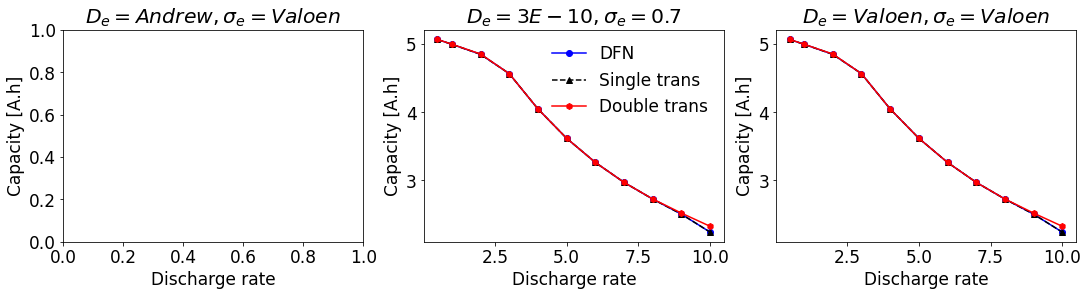

In [13]:
font = {'family' : 'DejaVu Sans','size'   : 17}
mpl.rc('font', **font)
Str=[ 'DFN',  'Single trans', 'Double trans' ]
fig, axs = plt.subplots(1,3,figsize=(5*3, 4), layout='constrained')
Colors = ['b','k','r',];LS = ['-','--','-'];MS=['o','^','h']
for i in range(0,3):
    #axs[0].plot(Rate_Dis_All,Andrew_All[i]['Cap_Dis_All'],color=Colors[i],linestyle=LS[i],marker = MS[i],label=Str[i])
    axs[1].plot(Rate_Dis_All,Constant_All[i]['Cap_Dis_All'],color=Colors[i],linestyle=LS[i],marker = MS[i],label=Str[i])
    axs[2].plot(Rate_Dis_All,Valoen_All[i]['Cap_Dis_All'],color=Colors[i],linestyle=LS[i],marker = MS[i],label=Str[i])
    axs[i].set_xlabel("Discharge rate")
    axs[i].set_ylabel("Capacity [A.h]")

axs[1].legend(loc='best',frameon=False,)
axs[0].set_title(r'$D_e = Andrew, \sigma_e=Valoen$',loc='center')
axs[1].set_title(r'$D_e = 3E-10, \sigma_e=0.7$',loc='center')
axs[2].set_title(r'$D_e = Valoen, \sigma_e=Valoen$',loc='center')

In [ ]:
# All cases contains: 3 para * 3 models * 11 C rates = 99 solutions  # for ageing, woundn't be c rates change, so 9 models 
# ['Andrew', 'Constant', 'Valoen']
# [ 'DFN',  'Single trans', 'Double trans' ]
# [0.5,1,2,3,4,5,6,7,8,9,10];  Rate_Cha_All = [1,]

# to access Andrew - DFN - 1C:
type(Andrew_All[0]['MyDict_All'][1]['Solution'])
# to access Andrew - 'Double trans' - 1C:
type(Andrew_All[2]['MyDict_All'][1]['Solution'])
# Andrew_All 5C


In [14]:
Plot_quick(Valoen_All, 5, 10)

interactive(children=(FloatSlider(value=0.31350113239490135, description='t', max=0.4597989641109953, min=0.31…

interactive(children=(FloatSlider(value=0.31350113239490135, description='t', max=0.4597989641109953, min=0.31…

In [16]:
Plot_quick(Constant_All, 5, 10)

interactive(children=(FloatSlider(value=0.31350113239441907, description='t', max=0.45979896411086163, min=0.3…

interactive(children=(FloatSlider(value=0.31350113239441907, description='t', max=0.45979896411086163, min=0.3…

In [ ]:
Plot_quick(Andrew_All, 5, 10)

In [ ]:
ind = 0
OCV = Sol_All[ind].cycles[0].steps[0]["X-averaged battery open circuit voltage [V]"].entries
V_CELL    = Sol_All[ind].cycles[0].steps[0]["Battery voltage [V]"].entries
eta_react = Sol_All[ind].cycles[0].steps[0]["X-averaged battery reaction overpotential [V]"].entries
eta_grad_cLi = Sol_All[ind].cycles[0].steps[0]["X-averaged battery concentration overpotential [V]"].entries
eta_grad_cEC = Sol_All[ind].cycles[0].steps[0]["X-averaged EC concentration overpotential [V]"].entries
eta_Ohmic_e = Sol_All[ind].cycles[0].steps[0]["X-averaged battery electrolyte ohmic losses [V]"].entries
eta_Ohmic_s = Sol_All[ind].cycles[0].steps[0]["X-averaged battery solid phase ohmic losses [V]"].entries
Sum_1_wo_EC = OCV+eta_react+eta_grad_cLi+eta_Ohmic_e+eta_Ohmic_s;
Sum_2_w_EC  = Sum_1_wo_EC + eta_grad_cEC;
Time_1 =  Sol_All[ind].cycles[0].steps[0]["Time [h]"].entries

fig, ax = plt.subplots(figsize=(4, 2.7), layout='constrained')
ax.plot(Time_1,V_CELL, label = 'Ternimal Voltage')
ax.plot(Time_1,Sum_1_wo_EC,  label = 'Sum_1_wo_EC')
ax.plot(Time_1,Sum_2_w_EC, '--', label = 'Sum_2_w_EC')
ax.set_title("Check plot",loc='center')
ax.set_xlabel("Time [h]")
ax.set_ylabel("Potential [V]")
ax.legend()

fig, ax = plt.subplots(figsize=(4, 2.7), layout='constrained')
ax.plot(Time_1,V_CELL-Sum_1_wo_EC, label = 'ref')
ax.plot(Time_1,eta_grad_cEC,  label = 'grad_cEC')
ax.set_title("Check plot",loc='center')
ax.set_xlabel("Time [h]")
ax.set_ylabel("Potential [V]")
ax.legend()

In [ ]:
#label = ["Double transport wo Sol affect potential","Double transport w Sol affect potential",] 
label = ["Normal DFN"] 
output_variables3 = [
    [
        "X-averaged battery open circuit voltage [V]",
        
        "Battery voltage [V]",
    ],
    [
        "X-averaged battery reaction overpotential [V]",
        "X-averaged battery electrolyte ohmic losses [V]",
        "X-averaged battery solid phase ohmic losses [V]",
    ],
    [
        "X-averaged battery concentration overpotential [V]",
        "X-averaged EC concentration overpotential [V]", # Mark Ruihe add
    ],
]
quick_plot = pybamm.QuickPlot(
    [
        Andrew_All[i]['MyDict_All'][5]['Solution'].cycles[0].steps[1] for i in range(0,1)
    ], 
    output_variables3,label,variable_limits='tight',
    time_unit='hours',
    spatial_unit='mm',   figsize = (18,6),  #  (“m”, “mm”, or “um”)
    n_rows=1) #
quick_plot.dynamic_plot()

In [ ]:
font = {'family' : 'DejaVu Sans','size'   : 11}
mpl.rc('font', **font)
pybamm.plot_voltage_components(Sol_All[0].cycles[0].steps[0])
pybamm.plot_voltage_components(Sol_All[1].cycles[0].steps[0])
pybamm.plot_voltage_components(Sol_All[2].cycles[0].steps[0])

In [ ]:
label = ["Normal DFN","Single transport","Double transport",] 
output_variables3 = [
    "EC concentration",
    "c(EC) over c(Li+)",
    "Minus div EC flux",
    "Minus div EC flux by diffusion",
    "Minus div EC flux by migration",
    "Minus div EC flux by Li+",
]
quick_plot = pybamm.QuickPlot(
    [
        sol.cycles[0].steps[0] for sol in Sol_All
    ], 
    output_variables3,label,variable_limits='fixed',
    time_unit='hours',
    spatial_unit='mm',     #  (“m”, “mm”, or “um”)
    n_rows=2) #figsize = (18,12),
quick_plot.dynamic_plot()

In [ ]:
label = ["Normal DFN","Single transport","Double transport",] 
output_variables3 = [
    "Electrolyte concentration",
    "Minus div Li+ flux",
    "Li+ source term",
    "Minus div Li+ flux by diffusion",
    "Minus div Li+ flux by migration",
    "Minus div Li+ flux by solvent",
]
quick_plot = pybamm.QuickPlot(
    [
        sol.cycles[0].steps[0] for sol in Sol_All
    ],  output_variables3,label,variable_limits='fixed',
    time_unit='hours',
    spatial_unit='mm',     #  (“m”, “mm”, or “um”)
    n_rows=2) #figsize = (18,12),
quick_plot.dynamic_plot()

In [ ]:
Plot_Last_Single_Step(Sol_2,0,0,BasicPath, Target,1,1,'False',"cool",17,200)

In [ ]:
Plot_Last_Single_Step(Sol_1,0,0,BasicPath, Target,1,1,'False',"cool",17,200)